In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from tqdm import tqdm_notebook
import string
from collections import Counter
import itertools
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
import pickle

In [3]:
tag_dataset=pd.read_csv("tagging_dataset.csv")
tag_dataset=tag_dataset.reset_index(drop=True)

In [4]:
tag_dataset=tag_dataset[["text","categories"]]

In [5]:
tag_dataset

,text,categories
0,Excellent and consistant car wash every time! ...,Automotive
1,What fantastic service. I scheduled an appoint...,Automotive
2,Came here for the first time tonight u called ...,Restaurants
3,IMPRESSION: How cool is it to have a golf driv...,Active Life
4,"I'm a lover of lush, and today stumbled upon t...",Beauty & Spas
...,...,...
313213,This place is the bees knees! I had the shrimp...,Restaurants
313214,"Shabby chic, international exotic, repurposed,...",Shopping
313215,"Great ice cream and food. Awesome atmosphere,...",Restaurants
313216,"Set up on this one. Anatoly came on a Sunday,...",Shopping


In [6]:
tag_dataset['labels'] = tag_dataset.categories.astype('category').cat.codes

In [7]:
### creating labels 

In [8]:
label_dict={0:"Active Life", 1:"Automotive",2:"Beauty & Spas",3:"Restaurants",4:"Shopping"}

In [9]:
type(label_dict)

dict

In [10]:
tag_dataset

,text,categories,labels
0,Excellent and consistant car wash every time! ...,Automotive,1
1,What fantastic service. I scheduled an appoint...,Automotive,1
2,Came here for the first time tonight u called ...,Restaurants,3
3,IMPRESSION: How cool is it to have a golf driv...,Active Life,0
4,"I'm a lover of lush, and today stumbled upon t...",Beauty & Spas,2
...,...,...,...
313213,This place is the bees knees! I had the shrimp...,Restaurants,3
313214,"Shabby chic, international exotic, repurposed,...",Shopping,4
313215,"Great ice cream and food. Awesome atmosphere,...",Restaurants,3
313216,"Set up on this one. Anatoly came on a Sunday,...",Shopping,4


In [11]:
text=tag_dataset['text'].values.tolist()
labels=tag_dataset['labels'].values.tolist()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.15, random_state=42, shuffle =False)

In [13]:
training_pipe=Pipeline([("Vectorization",TfidfVectorizer()),("SVC",LinearSVC())])

In [14]:
training_pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorization', TfidfVectorizer()), ('SVC', LinearSVC())])

In [15]:
print('Training set score: ' + str(training_pipe.score(X_train,y_train)))
print('Test set score: ' + str(training_pipe.score(X_test,y_test)))

Training set score: 0.9068942851240446
Test set score: 0.8503714109358704


In [16]:
yhat=training_pipe.predict(X_test)

In [17]:
ytrue=y_test

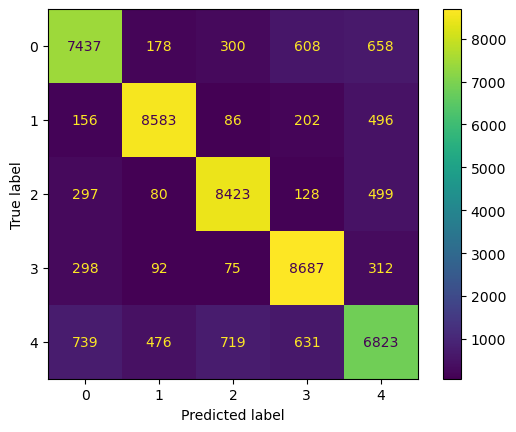

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(ytrue, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [19]:
print(metrics.classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      9181
           1       0.91      0.90      0.91      9523
           2       0.88      0.89      0.89      9427
           3       0.85      0.92      0.88      9464
           4       0.78      0.73      0.75      9388

    accuracy                           0.85     46983
   macro avg       0.85      0.85      0.85     46983
weighted avg       0.85      0.85      0.85     46983



In [24]:
out=training_pipe.predict(['This is one of the best session I had, almost i am refreshed'])[0]

In [25]:
label_dict.get(out)

'Beauty & Spas'

In [26]:
with open('tagging_model.pickle', 'wb') as f:
  pickle.dump(training_pipe, f)